In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from patsy import dmatrix

In [2]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={'parcelid':int})

In [3]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={'fireplaceflag':object, 'taxdelinquencyflag':object, 'fireplaceflag':object, 'propertyzoningdesc':object, 'propertycountylandusecode':object, 'hashottuborspa':object})

In [4]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [5]:
train_df = train_df1.copy()

In [6]:
missing_df = train_df.isnull().sum().reset_index()
missing_df.columns = ['col','missing_cnt']
missing_df['missing_ratio'] = missing_df.missing_cnt / len(train_df)
missing_df.sort_values(by='missing_ratio',inplace=True)
missing_df.reset_index(inplace=True)

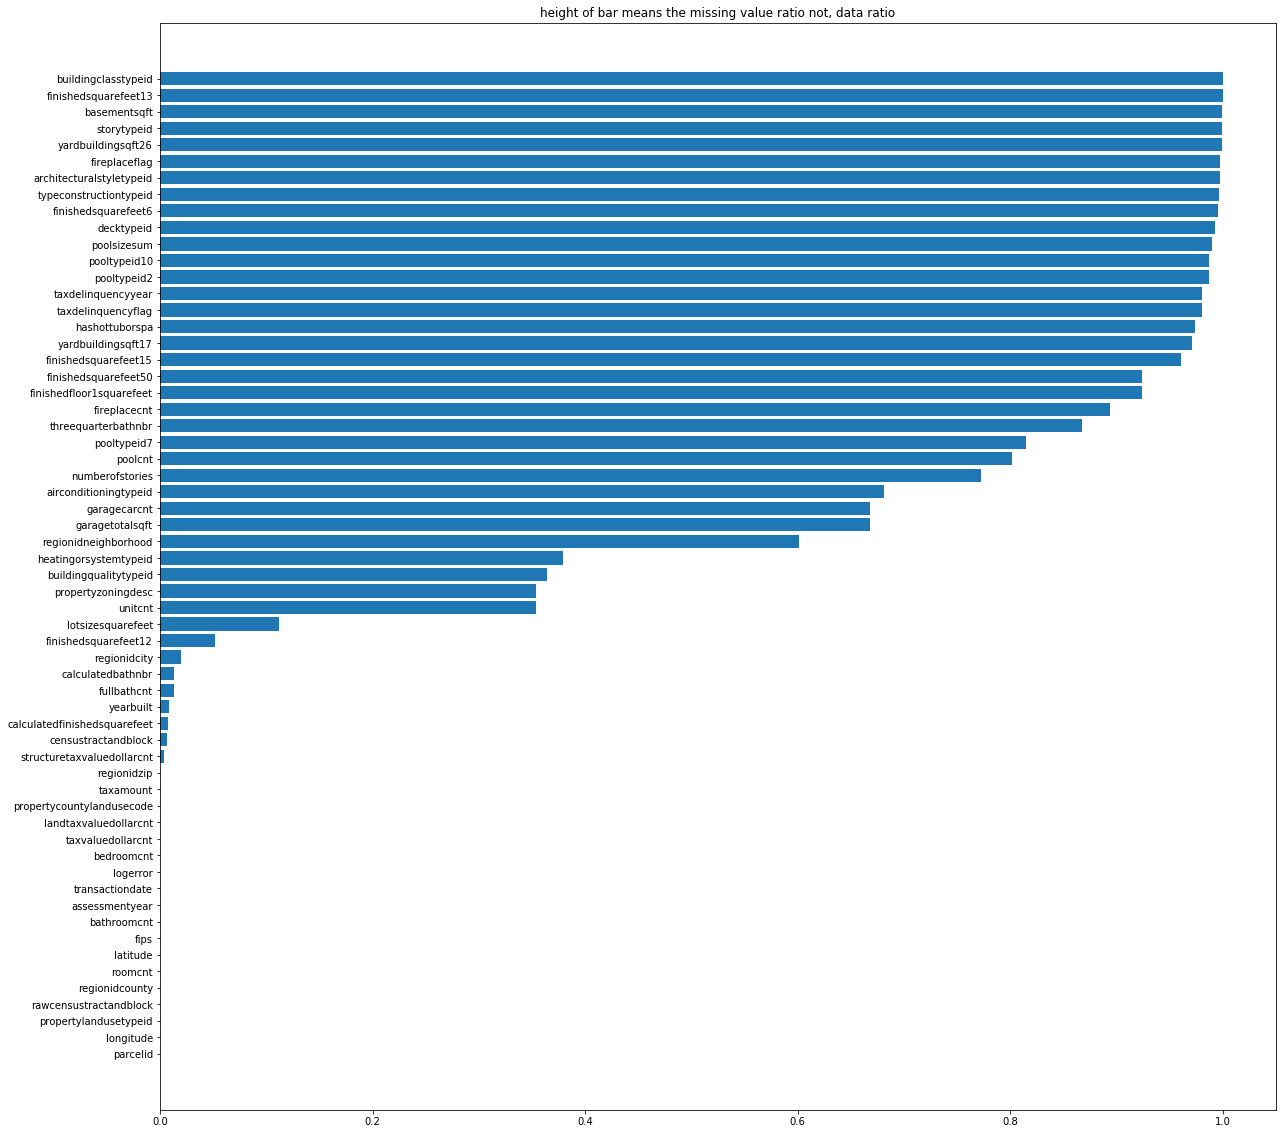

In [7]:
plt.figure(figsize=(20,20))
missing_df.tail()
plt.barh(missing_df.col,missing_df.missing_ratio)
plt.title('height of bar means the missing value ratio not, data ratio')
plt.show()

# filling the data

In [8]:
train_df.calculatedbathnbr = train_df.calculatedbathnbr.fillna(train_df.calculatedbathnbr.mode()[0])

In [9]:
train_df.fullbathcnt = train_df.fullbathcnt.fillna(train_df.fullbathcnt.mode()[0])

In [10]:
train_df.heatingorsystemtypeid = train_df.heatingorsystemtypeid.fillna(train_df.heatingorsystemtypeid.mode()[0])

In [11]:
train_df.heatingorsystemtypeid = train_df.heatingorsystemtypeid.astype('object')

In [12]:
train_df.garagecarcnt = train_df.garagecarcnt.fillna(train_df.garagecarcnt.mode()[0])

In [13]:
train_df.garagetotalsqft = train_df.garagetotalsqft.fillna(np.mean(train_df.garagetotalsqft))

In [14]:
train_df.airconditioningtypeid = train_df.airconditioningtypeid.fillna(train_df.airconditioningtypeid.mode()[0])

In [15]:
train_df.airconditioningtypeid = train_df.airconditioningtypeid.astype('object')

In [16]:
train_df.poolcnt = train_df.poolcnt.fillna(0)

In [17]:
train_df.poolcnt = train_df.poolcnt.astype('object')

In [18]:
train_df.pooltypeid7 = train_df.pooltypeid7.fillna(0)

In [19]:
train_df.pooltypeid7 = train_df.pooltypeid7.astype('object')

In [20]:
train_df.threequarterbathnbr = train_df.threequarterbathnbr.fillna(0)

In [21]:
train_df.hashottuborspa  = train_df.hashottuborspa .fillna('False')

In [22]:
train_df.fireplacecnt  = train_df.fireplacecnt .fillna(0)

In [23]:
train_df.fireplacecnt = train_df.fireplacecnt.astype('object')

In [24]:
train_df.pooltypeid2  = train_df.pooltypeid2 .fillna(0)

In [25]:
train_df.pooltypeid2 = train_df.pooltypeid2.astype('object')

In [26]:
train_df.pooltypeid10  = train_df.pooltypeid10 .fillna(0)

In [27]:
train_df.pooltypeid10 = train_df.pooltypeid10.astype('object')

In [28]:
train_df.poolsizesum  = train_df.poolsizesum .fillna(0)

In [29]:
train_df.fireplaceflag  = train_df.fireplaceflag .fillna('False')

In [30]:
train_df.yearbuilt = train_df.yearbuilt.fillna(train_df.yearbuilt.mode()[0])

In [31]:
train_df.unitcnt = train_df.unitcnt.fillna(train_df.unitcnt.mode()[0])

In [32]:
train_df.buildingqualitytypeid = train_df.buildingqualitytypeid.fillna(train_df.buildingqualitytypeid.mean())

In [33]:
train_df.buildingqualitytypeid = train_df.buildingqualitytypeid.astype('object')

In [34]:
train_df.numberofstories = train_df.numberofstories.fillna(train_df.numberofstories.mode()[0])

In [35]:
train_df.typeconstructiontypeid = train_df.typeconstructiontypeid.fillna('None')

In [36]:
train_df.typeconstructiontypeid = train_df.typeconstructiontypeid.astype('object')

In [37]:
train_df.architecturalstyletypeid = train_df.architecturalstyletypeid.fillna('None')

In [38]:
train_df.architecturalstyletypeid = train_df.architecturalstyletypeid.astype('object')

In [39]:
train_df.storytypeid = train_df.storytypeid.fillna('None')

In [40]:
train_df.storytypeid = train_df.storytypeid.astype('object')

In [41]:
train_df.buildingclasstypeid = train_df.buildingclasstypeid.fillna('None')

In [42]:
train_df.buildingclasstypeid = train_df.buildingclasstypeid.astype('object')

In [43]:
train_df.decktypeid = train_df.decktypeid.fillna('None')

In [44]:
train_df.decktypeid = train_df.decktypeid.astype('object')

In [45]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.fillna(train_df.propertycountylandusecode.mode()[0])

In [46]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.astype('object') 

In [47]:
train_df.propertylandusetypeid = train_df.propertylandusetypeid.astype('object') 

In [48]:
train_df.drop(columns='censustractandblock',inplace=True)

In [49]:
train_df.rawcensustractandblock = [str(raw)[:5] for raw in train_df.rawcensustractandblock]

In [50]:
train_df.fips = train_df.fips.astype('object') 

In [51]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.astype('object') 

In [52]:
train_df.regionidzip = train_df.regionidzip.fillna(train_df.regionidzip.mode()[0])

In [53]:
train_df.regionidzip = train_df.regionidzip.astype('object') 

In [54]:
train_df.regionidcity = train_df.regionidcity.fillna(train_df.regionidcity.mode()[0])

In [55]:
train_df.regionidcity = train_df.regionidcity.astype('object') 

In [56]:
train_df.propertyzoningdesc = train_df.propertyzoningdesc.fillna('None')

In [57]:
train_df.propertyzoningdesc = train_df.propertyzoningdesc.astype('object') 

In [58]:
train_df.regionidneighborhood = train_df.regionidneighborhood.fillna((np.mean(train_df.regionidneighborhood)))

In [59]:
train_df.calculatedfinishedsquarefeet = train_df.calculatedfinishedsquarefeet.fillna(train_df.calculatedfinishedsquarefeet.mode()[0])

In [60]:
train_df.finishedsquarefeet12 = train_df.finishedsquarefeet12.fillna(train_df.finishedsquarefeet12.mode()[0])

In [61]:
train_df.lotsizesquarefeet = train_df.lotsizesquarefeet.fillna(train_df.lotsizesquarefeet.mode()[0])

In [62]:
train_df.finishedfloor1squarefeet = train_df.finishedfloor1squarefeet.fillna(0)

In [63]:
train_df.finishedsquarefeet50 = train_df.finishedsquarefeet50.fillna(0)

In [64]:
train_df.finishedsquarefeet15 = train_df.finishedsquarefeet15.fillna(0)

In [65]:
train_df.finishedsquarefeet6 = train_df.finishedsquarefeet6.fillna(0)

In [66]:
train_df.basementsqft = train_df.basementsqft.fillna(0)

In [67]:
train_df.finishedsquarefeet13 = train_df.finishedsquarefeet13.fillna(0)

In [68]:
train_df.drop(columns='assessmentyear',inplace=True)

In [69]:
train_df.taxvaluedollarcnt  = train_df.taxvaluedollarcnt .fillna(np.mean(train_df.taxvaluedollarcnt))

In [70]:
train_df.landtaxvaluedollarcnt  = train_df.landtaxvaluedollarcnt .fillna(np.mean(train_df.landtaxvaluedollarcnt))

In [71]:
train_df.taxamount = train_df.taxamount.fillna(np.mean(train_df.taxamount))

In [72]:
train_df.structuretaxvaluedollarcnt = train_df.structuretaxvaluedollarcnt.fillna(np.mean(train_df.structuretaxvaluedollarcnt))

In [73]:
train_df.taxdelinquencyflag = train_df.taxdelinquencyflag.fillna('F')

In [74]:
train_df.taxdelinquencyyear = train_df.taxdelinquencyyear.fillna('None')

In [75]:
train_df.yardbuildingsqft17 = train_df.yardbuildingsqft17.fillna(0)

In [76]:
train_df.yardbuildingsqft26 = train_df.yardbuildingsqft26.fillna(0)

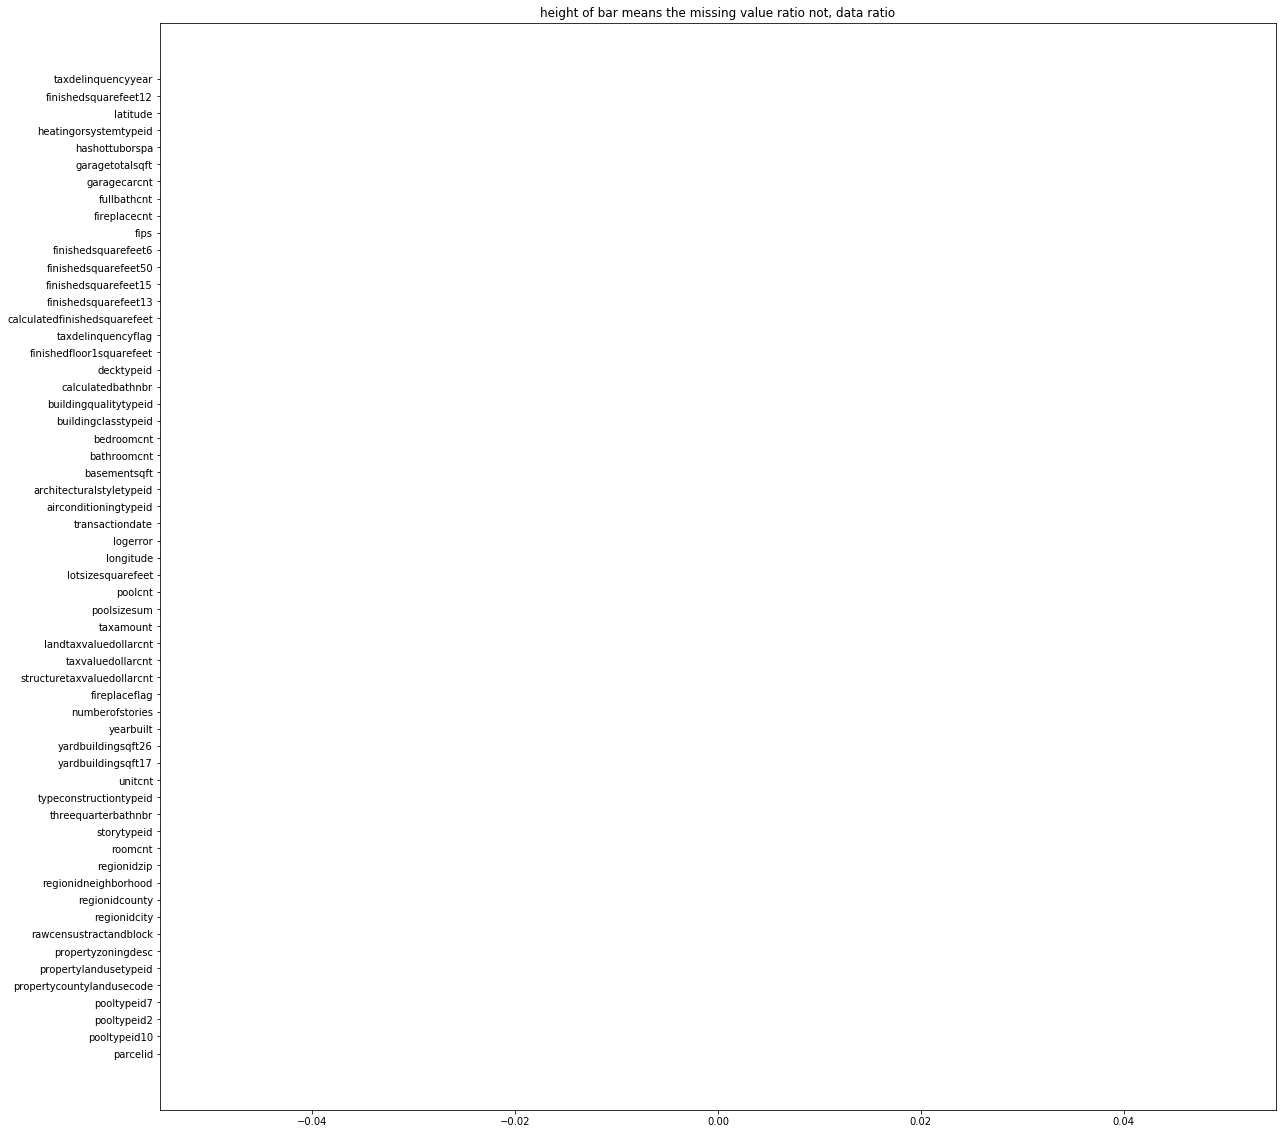

In [77]:
missing_df = train_df.isnull().sum().reset_index()
missing_df.columns = ['col','missing_cnt']
missing_df['missing_ratio'] = missing_df.missing_cnt / len(train_df)
missing_df.sort_values(by='missing_ratio',inplace=True)
missing_df.reset_index(inplace=True)
plt.figure(figsize=(20,20))
missing_df.tail()
plt.barh(missing_df.col,missing_df.missing_ratio)
plt.title('height of bar means the missing value ratio not, data ratio')
plt.show()

In [78]:
numerical_features = [col for col in train_df.columns if train_df[col].dtypes != 'object']
categorical_features = [col for col in train_df.columns if train_df[col].dtypes == 'object']
len(numerical_features),len(categorical_features)

(34, 24)

In [79]:
numerical_features.remove('transactiondate')
numerical_features.remove('logerror')
numerical_features.remove('parcelid')

In [80]:
correl_val = []
for col in numerical_features:
    correl_val.append(np.corrcoef(train_df['logerror'],train_df[col])[0][1])
len(correl_val)
correl_val = sorted(correl_val)

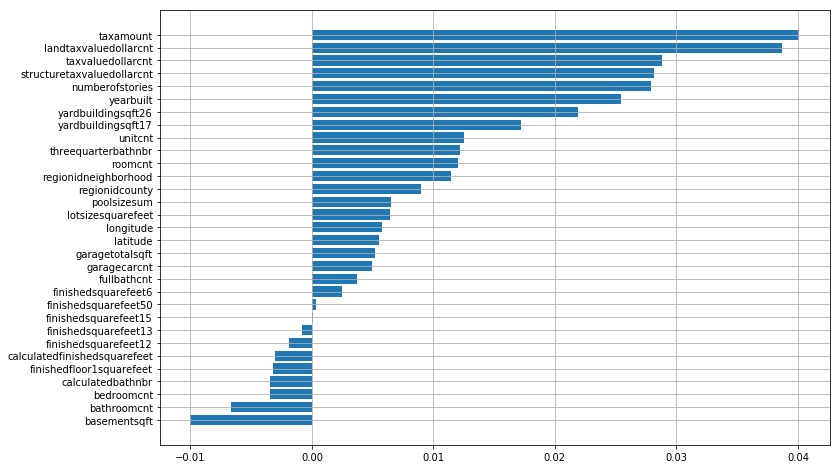

In [81]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.barh(numerical_features,correl_val)
plt.show()

<Figure size 1800x1800 with 0 Axes>

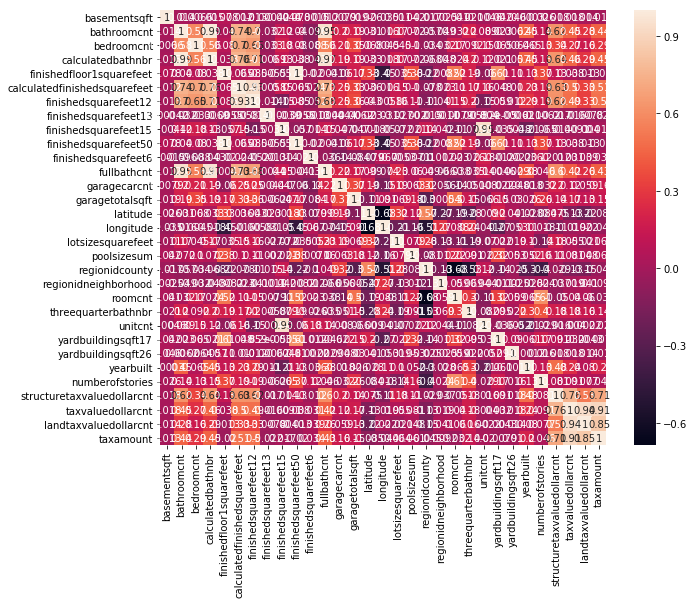

In [82]:
plt.figure(figsize=(25,25))
corrmat = train_df[numerical_features].corr(method = 'spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corrmat,annot=True)
plt.show()

### Comment:
- 이는 독립변수 간의 상관관계를 나타내는 heatmap을 그려본 것이다.
- 상관관계가 높은 columns들이 있음을 알 수 있다.
- 높은 상관관계를 띄고 있기 때문에 선형회귀모형 가정을 충족시키기 위해서 일부 컬럼의 삭제가 진행되어야 한다.
- 나머지 컬럼들에 대한 처리는 후에 진행될 VIF 와 함께 추가적으로 실시한다.

### Determination of outliers and variables unsing OLS model

- model by all numerical features

In [83]:
train_n = train_df[numerical_features]
train_n = sm.add_constant(train_n)
len(train_n.columns)

32

In [84]:
train_y = train_df['logerror']
train_y.tail()

90270   -0.0356
90271    0.0070
90272   -0.2679
90273    0.0602
90274    0.4207
Name: logerror, dtype: float64

### T-test 를 통한 변수 중요도 검정

In [85]:
train_df.fireplacecnt.dtypes

dtype('O')

In [86]:
model1_1_formula = sm.OLS.from_formula('logerror ~ scale(basementsqft)+ scale(bathroomcnt) +scale(bedroomcnt) +scale(finishedfloor1squarefeet) +scale(calculatedfinishedsquarefeet) +scale(finishedsquarefeet12)+ scale(finishedsquarefeet13) +scale(finishedsquarefeet15) +scale(finishedsquarefeet50) +scale(finishedsquarefeet6)+scale(garagecarcnt)+ scale(garagetotalsqft)+ scale(latitude) +scale(longitude) +scale(lotsizesquarefeet) +scale(poolsizesum)+ scale(regionidneighborhood)+ scale(roomcnt)+ scale(unitcnt) +scale(yardbuildingsqft17)+ scale(yardbuildingsqft26)+ scale(yearbuilt)+ scale(numberofstories)+ scale(structuretaxvaluedollarcnt)+ scale(taxamount)',train_df)
result1_1_formula = model1_1_formula.fit()
print(result1_1_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.16
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           1.07e-59
Time:                        19:06:58   Log-Likelihood:                 36912.
No. Observations:               90275   AIC:                        -7.377e+04
Df Residuals:                   90249   BIC:                        -7.353e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

- t-test 를 통한 변수 중요도 검정 (유의수준 30% 이상)
    - bedroomcnt , finishedsquarefeet12 ,finishedsquarefeet15 , finishedsquarefeet50 , garagecarcnt , longitude , regionidneighborhood , roomcnt , unitcnt , yardbuildingsqft26 , yearbuilt , numberofstories

### F-test를 통한 변수 중요도 검정

In [87]:
sm.stats.anova_lm(result1_1_formula, typ=2).sort_values('PR(>F)')

,sum_sq,df,F,PR(>F)
scale(taxamount),3.503170,1.0,135.507593,2.692178e-31
scale(structuretaxvaluedollarcnt),0.651474,1.0,25.199921,5.178241e-07
scale(poolsizesum),0.283954,1.0,10.983744,9.195072e-04
scale(finishedsquarefeet6),0.221007,1.0,8.548864,3.458238e-03
scale(basementsqft),0.149971,1.0,5.801073,1.601839e-02
scale(calculatedfinishedsquarefeet),0.137690,1.0,5.326061,2.101106e-02
scale(bathroomcnt),0.095923,1.0,3.710452,5.407587e-02
scale(lotsizesquarefeet),0.090336,1.0,3.494317,6.158304e-02
scale(garagetotalsqft),0.072438,1.0,2.802021,9.414904e-02
scale(finishedfloor1squarefeet),0.042097,1.0,1.628356,2.019339e-01


- F-test 를 통한 변수 중요도 검정 (p-value : 2.037675e-01 deleting)
    - finishedsquarefeet12 , longitude , roomcnt , yearbuilt , bedroomcnt , numberofstories , garagecarcnt , unitcnt , regionidneighborhood , finishedsquarefeet50 , yardbuildingsqft26 , finishedsquarefeet15  , finishedsquarefeet13 , yardbuildingsqft17 , latitude

### VIF 검정을 통한 변수 독립성 검정

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_n.values, i) for i in range(train_n.shape[1])]
vif["features"] = train_n.columns
vif.sort_values(by='VIF Factor',inplace=True)
vif.reset_index(drop=True,inplace=True)
vif

/home/hskimim/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/hskimim/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,1.016404,basementsqft
2,1.033721,yardbuildingsqft26
3,1.040066,finishedsquarefeet13
4,1.052563,lotsizesquarefeet
5,1.066721,regionidneighborhood
6,1.363508,poolsizesum
7,1.368352,unitcnt
8,1.491553,yardbuildingsqft17
9,1.792743,yearbuilt


- vif 높은 값들을 잘라낸다.
    - fullbathcnt, calculatedbathnbr , threequarterbathnbr , taxvaluedollarcnt , landtaxvaluedollarcnt , structuretaxvaluedollarcnt , finishedfloor1squarefeet , finishedsquarefeet50 , calculatedfinishedsquarefeet , finishedsquarefeet12 , bathroomcnt

- 파라미터의 중요도
    - t-test
    - F-test
- 파라미터의 독립성
    - vif

In [90]:
vif_ls = ['fullbathcnt', 'calculatedbathnbr' , 'threequarterbathnbr' , 'taxvaluedollarcnt' , 'landtaxvaluedollarcnt' , 'structuretaxvaluedollarcnt' , 'finishedfloor1squarefeet' , 'finishedsquarefeet50' , 'calculatedfinishedsquarefeet' , 'finishedsquarefeet12' , 'bathroomcnt']
len(vif_ls)

11

In [91]:
t_test_ls = ['bedroomcnt' , 'finishedsquarefeet12' ,'finishedsquarefeet15' , 'finishedsquarefeet50' , 'garagecarcnt' , 'longitude' , 'regionidneighborhood' , 'roomcnt' , 'unitcnt' , 'yardbuildingsqft26' , 'yearbuilt' , 'numberofstories']
len(t_test_ls)

12

In [92]:
f_test_ls =['finishedsquarefeet12' , 'longitude' , 'roomcnt' , 'yearbuilt' , 'bedroomcnt' , 'numberofstories' , 'garagecarcnt' , 'unitcnt' , 'regionidneighborhood' , 'finishedsquarefeet50' , 'yardbuildingsqft26' , 'finishedsquarefeet15' , 'finishedsquarefeet13' , 'yardbuildingsqft17' , 'latitude']
len(f_test_ls)

15

In [93]:
for col in vif_ls:
    numerical_features.remove(col)

In [94]:
for col in t_test_ls:
    try:numerical_features.remove(col)
    except:pass
len(numerical_features)

10

In [95]:
for col in f_test_ls:
    try:numerical_features.remove(col)
    except:pass
len(numerical_features)

7

In [96]:
train_new_n = train_df[numerical_features]
train_new_n = sm.add_constant(train_new_n)
train_y = train_df['logerror']

In [97]:
train_new_n.columns

Index(['const', 'basementsqft', 'finishedsquarefeet6', 'garagetotalsqft',
       'lotsizesquarefeet', 'poolsizesum', 'regionidcounty', 'taxamount'],
      dtype='object')

In [98]:
model1_2_formula = sm.OLS.from_formula('logerror ~ scale(basementsqft) + scale(finishedsquarefeet6) +  scale(garagetotalsqft) + scale(lotsizesquarefeet) + scale(poolsizesum) +scale(regionidcounty)+ scale(taxamount)',train_df)
result1_2_formula = model1_2_formula.fit()
sm.stats.anova_lm(result1_2_formula, typ=2).sort_values('PR(>F)')

,sum_sq,df,F,PR(>F)
scale(garagetotalsqft),0.343557,1.0,13.245318,0.000273
scale(basementsqft),0.188611,1.0,7.271591,0.007007
scale(finishedsquarefeet6),0.169293,1.0,6.526808,0.010628
scale(taxamount),0.159226,1.0,6.138690,0.013227
scale(lotsizesquarefeet),0.056005,1.0,2.159192,0.141723
scale(poolsizesum),0.038444,1.0,1.482144,0.223443
scale(regionidcounty),0.004058,1.0,0.156437,0.692460
Residual,2341.348446,90267.0,NaN,NaN


In [99]:
print(result1_2_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.156
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           6.99e-06
Time:                        19:07:06   Log-Likelihood:                 36754.
No. Observations:               90275   AIC:                        -7.349e+04
Df Residuals:                   90267   BIC:                        -7.342e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_new_n.values, i) for i in range(train_new_n.shape[1])]
vif["features"] = train_new_n.columns
vif.sort_values(by='VIF Factor',inplace=True)
vif.reset_index(drop=True,inplace=True)
vif

,VIF Factor,features
0,1.001699,basementsqft
1,1.014854,lotsizesquarefeet
2,1.020496,finishedsquarefeet6
3,1.026170,regionidcounty
4,1.033006,poolsizesum
5,1.034295,taxamount
6,1.070490,garagetotalsqft
7,16.358773,const


## Categorical Variable OLS 

In [101]:
train_c = train_df[categorical_features]
train_y = train_df['logerror']

In [102]:
train_c.columns,len(train_c.columns)

(Index(['airconditioningtypeid', 'architecturalstyletypeid',
        'buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid', 'fips',
        'fireplacecnt', 'hashottuborspa', 'heatingorsystemtypeid', 'poolcnt',
        'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
        'propertycountylandusecode', 'propertylandusetypeid',
        'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
        'regionidzip', 'storytypeid', 'typeconstructiontypeid', 'fireplaceflag',
        'taxdelinquencyflag', 'taxdelinquencyyear'],
       dtype='object'), 24)

In [103]:
model2_1 = sm.OLS.from_formula('logerror ~ 0 + C(airconditioningtypeid) + C(architecturalstyletypeid)+C(rawcensustractandblock) + C(buildingqualitytypeid) + C(buildingclasstypeid) + C(decktypeid) + C(fips) + C(hashottuborspa) + C(heatingorsystemtypeid) + C(poolcnt) + C(pooltypeid10) + C(pooltypeid2) + C(pooltypeid7) + C(propertylandusetypeid) + C(storytypeid) + C(typeconstructiontypeid) + C(fireplaceflag) + C(taxdelinquencyflag) + C(taxdelinquencyyear)',train_df)
result2_1 = model2_1.fit()

클래스가 많은 regionidzip, regionidcity, propertyzoningdesc, propertycountylandusecode를 제외하고 OLS를 돌려본다.

In [104]:
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.610
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           7.73e-36
Time:                        19:16:19   Log-Likelihood:                 36906.
No. Observations:               90275   AIC:                        -7.366e+04
Df Residuals:                   90200   BIC:                        -7.296e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

VIF 를 통해서 dependency 가 높은 컬럼들, 더미들을 제외하고 돌려본다.

In [ ]:
train_c = train_df[categorical_features]
train_c = pd.get_dummies(train_c)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_c.values, i) for i in range(train_c.shape[1])]
vif["features"] = train_c.columns
vif.sort_values(by='VIF Factor',inplace=True)
vif.reset_index(drop=True,inplace=True)
vif

In [ ]:
low_dependence_c = vif[:12]['features'].values

In [ ]:
train_new_c = train_c[low_dependence_c]
train_y = train_df['logerror']

In [ ]:
model2_2 = sm.OLS(train_y,train_new_c)
result2_2 = model2_2.fit()
print(result2_2.summary())

카테고리 변수들의 중요성 파악

In [106]:
len(categorical_features)

24

In [108]:
for cat in categorical_features[:6]:
    model = sm.OLS.from_formula('logerror ~ C('+col+')+0',train_df)
    print(cat,sm.stats.anova_lm(model.fit()))

MemoryError: 

In [ ]:
for cat in categorical_features[6:12]:
    model = sm.OLS.from_formula('logerror ~ C('+col+')+0',train_df)
    print(cat,sm.stats.anova_lm(model.fit()))

In [ ]:
for cat in categorical_features[12:18]:
    model = sm.OLS.from_formula('logerror ~ C('+col+')+0',train_df)
    print(cat,sm.stats.anova_lm(model.fit()))

In [ ]:
for cat in categorical_features[18:]:
    model = sm.OLS.from_formula('logerror ~ C('+col+')+0',train_df)
    print(cat,sm.stats.anova_lm(model.fit()))

# Feature Engineering
- Categorical Feature engineering
- Numerical Feature engineering

In [ ]:
model = sm.OLS.from_formula('logerror ~ 0 + C(airconditioningtypeid) + C(architecturalstyletypeid) + C(buildingclasstypeid) + C(decktypeid) + C(fips) + C(hashottuborspa) + C(heatingorsystemtypeid) + C(poolcnt) + C(pooltypeid10) + C(pooltypeid2) + C(pooltypeid7) + C(propertycountylandusecode) + C(propertylandusetypeid) + C(propertyzoningdesc) + C(regionidcity) + C(regionidzip) + C(storytypeid) + C(typeconstructiontypeid) + C(fireplaceflag) + C(taxdelinquencyflag) + C(taxdelinquencyyear)',train_df)
result = model.fit()

F-test 를 통한 변수 중요도 검증

- 해당 컬럼의 중요도가 0이다 라는 귀무가설에 대한 신뢰수준을 나타내는 PR(>F) 부분에 대해서 점검을 한다.
- 우선 중요도값이 NaN이 나온 컬럼들을 제거해준다.
- 또한 자릿수가 e-01인 컬럼들도 제거해준다.

## 변수 변환

In [ ]:
len(numeric_dfX.columns)

In [ ]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(numeric_dfX.columns):
    plt.subplot(5,4,idx+1)
    plt.plot(numeric_dfX[col].index,numeric_dfX[col].values)
    plt.title(col)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(numeric_dfX.columns):
    plt.subplot(5,4,idx+1)
    plt.scatter(numeric_dfX[col].values,train_df.logerror)
    plt.title(col)
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(revised_result, fig=fig)
fig.suptitle("")
plt.show()

In [ ]:
sp.stats.probplot(revised_result.resid, plot=plt)
plt.show()

In [ ]:
sns.distplot(revised_result.resid)
plt.show()

## Leverage & Outlier

In [ ]:
influence = revised_result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()